In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import os
import pickle
import re

### Load Data

In [83]:
weather_data_path = '/home/cneiderer/Metis/boston_weather_data'

In [181]:
weather_df = pd.DataFrame()
for f in os.listdir(weather_data_path):
    fparts = os.path.splitext(f)
    if fparts[1] == '.csv':
        weather_df = pd.concat([weather_df, pd.read_csv(os.path.join(weather_data_path, f))], axis=0)

/home/cneiderer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10,11,14,15,84,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14,15,67,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14,15,22,23,25,67,84,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10,11,84,86) have mixed types. Specify dtype option on impo

In [182]:
# Select hourly columns only
cols = ['DATE']
for c in weather_df.columns[7:]:
    if c[:6].lower() == 'hourly':
        cols.append(c)
weather_df = weather_df[cols]

# Remove hourly from column names
cols = []
for c in weather_df.columns:
    cols.append(re.sub('hourly', '', c.lower()))
weather_df.columns = cols  
weather_df.head()

,date,skyconditions,visibility,prsentweathertype,drybulbtempf,drybulbtempc,wetbulbtempf,wetbulbtempc,dewpointtempf,dewpointtempc,relativehumidity,windspeed,winddirection,windgustspeed,stationpressure,pressuretendency,pressurechange,sealevelpressure,precip,altimetersetting
0,2018-01-01 00:54,CLR:00,10.00,NaN,2,-16.7,0.0,-17.5,-9,-22.8,59.0,16,320,24.0,30.17,1.0,NaN,30.20,0.00,30.20
1,2018-01-01 01:00,NaN,NaN,NaN,2,-16.7,0.0,-17.5,-9,-22.8,59.0,16,320,NaN,30.18,1.0,-0.01,30.20,NaN,NaN
2,2018-01-01 01:54,CLR:00,10.00,NaN,1,-17.2,0.0,-18.0,-10,-23.3,59.0,11,300,21.0,30.19,NaN,NaN,30.22,0.00,30.22
3,2018-01-01 02:54,CLR:00,10.00,NaN,1,-17.2,-1.0,-18.1,-12,-24.4,54.0,21,290,28.0,30.19,NaN,NaN,30.22,0.00,30.22
4,2018-01-01 03:54,CLR:00,10.00,NaN,1,-17.2,-1.0,-18.1,-12,-24.4,54.0,18,290,24.0,30.18,0.0,NaN,30.20,0.00,30.21


In [183]:
# Select columns
weather_df = weather_df[['date', 'skyconditions', 'visibility', 'prsentweathertype', 
                         'drybulbtempf', 'drybulbtempc', 'relativehumidity', 
                         'windspeed', 'winddirection', 'stationpressure', 
                         'pressuretendency', 'pressurechange', 'precip']]
# Rename columns
weather_df.columns = ['MeasurementTime', 'SkyConditions', 'Visibility', 'WeatherType', 
                      'TempC', 'TempF', 'Humidity', 'WindSpeed', 'WindDirectin',
                      'Pressure', 'PressureTendency', 'PressureChange', 'Precip']
weather_df.head()

,MeasurementTime,SkyConditions,Visibility,WeatherType,TempC,TempF,Humidity,WindSpeed,WindDirectin,Pressure,PressureTendency,PressureChange,Precip
0,2018-01-01 00:54,CLR:00,10.00,NaN,2,-16.7,59.0,16,320,30.17,1.0,NaN,0.00
1,2018-01-01 01:00,NaN,NaN,NaN,2,-16.7,59.0,16,320,30.18,1.0,-0.01,NaN
2,2018-01-01 01:54,CLR:00,10.00,NaN,1,-17.2,59.0,11,300,30.19,NaN,NaN,0.00
3,2018-01-01 02:54,CLR:00,10.00,NaN,1,-17.2,54.0,21,290,30.19,NaN,NaN,0.00
4,2018-01-01 03:54,CLR:00,10.00,NaN,1,-17.2,54.0,18,290,30.18,0.0,NaN,0.00


In [2]:
with open('combo_mapped.pkl', 'rb') as f:
    combo_df = pickle.load(f)

In [3]:
combo_df.head()

,BikeID,BirthYear,Duration,Gender,NumDocks,StartCity,StartID,StartLat,StartLon,StartName,StartTime,StopCity,StopID,StopLat,StopLon,StopName,StopTime
0,1380,1983,196,Female,15.0,Cambridge,M32007,42.372969,-71.094445,Cambridge St - at Columbia St / Webster Ave,2016-11-01 00:00:35,Somerville,S32002,42.379637,-71.095319,Union Square - Somerville,2016-11-01 00:03:52
1,866,1980,222,Male,21.0,Boston,B32008,42.358920,-71.057629,Mayor Martin J Walsh - 28 State St,2016-11-01 00:01:23,Boston,A32025,42.365598,-71.064248,Nashua Street at Red Auerbach Way,2016-11-01 00:05:06
2,35,1990,483,Male,19.0,Cambridge,M32041,42.359573,-71.101295,MIT Pacific St at Purrington St,2016-11-01 00:04:19,Cambridge,M32047,42.357753,-71.103934,Sidney Research Campus/ Erie Street at Waverly,2016-11-01 00:12:22
3,1917,NaN,141,Unknown,15.0,Boston,A32009,42.341332,-71.076847,Tremont St / W Newton St,2016-11-01 00:05:31,Boston,C32007,42.345959,-71.082578,Prudential Center / Belvidere,2016-11-01 00:07:53
4,603,1990,154,Male,17.0,Cambridge,M32012,42.366426,-71.105495,Central Sq Post Office / Cambridge City Hall a...,2016-11-01 00:05:59,Cambridge,M32030,42.361589,-71.107437,Dana Park,2016-11-01 00:08:34


In [25]:
tmp = combo_df[['StartTime', 'StartCity']]
tmp = tmp.set_index('StartTime')

In [27]:
tmp.head()

,StartCity
StartTime,
2016-11-01 00:00:35,Cambridge
2016-11-01 00:01:23,Boston
2016-11-01 00:04:19,Cambridge
2016-11-01 00:05:31,Boston
2016-11-01 00:05:59,Cambridge


In [28]:
x = tmp.resample('15T').count()

In [34]:
x.head()

,StartCity
StartTime,
2011-07-28 10:15:00,1
2011-07-28 10:30:00,1
2011-07-28 10:45:00,0
2011-07-28 11:00:00,0
2011-07-28 11:15:00,0


In [35]:
x.describe()

,StartCity
count,231127.000000
mean,27.877284
std,38.198623
min,0.000000
25%,1.000000
50%,11.000000
75%,42.000000
max,284.000000


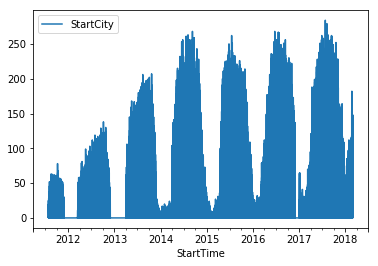

In [32]:
x.plot()

In [45]:
x.shape

(231127, 1)

In [69]:
for idx in x.index.date[:24*8]:
    print(idx in us_holidays)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [70]:
from datetime import datetime

In [11]:
tmp = ts.resample('15T').count()

In [37]:
tmp2 = combo_df[['StopTime', 'StopCity']]
tmp2 = tmp2.set_index('StopTime')

In [41]:
y = tmp2.resample('15T').count()

In [42]:
y.head()

,StopCity
StopTime,
2011-07-28 10:15:00,1
2011-07-28 10:30:00,1
2011-07-28 10:45:00,0
2011-07-28 11:00:00,0
2011-07-28 11:15:00,0


In [43]:
y.describe()

,StopCity
count,232242.000000
mean,27.733997
std,38.072398
min,0.000000
25%,1.000000
50%,10.000000
75%,42.000000
max,285.000000


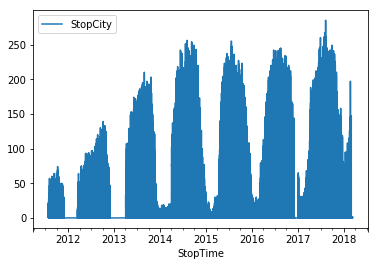

In [44]:
y.plot()

In [46]:
y.shape

(232242, 1)

In [47]:
a = combo_df.StartTime.dt.quarter

In [48]:
set(a)

{1, 2, 3, 4}

In [49]:
import holidays

In [50]:
us_holidays = holidays.UnitedStates()

In [51]:
us_holidays

{}

In [55]:
'12/31/2018' in us_holidays 

False

In [57]:
us_holidays.items()

dict_items([(datetime.date(2018, 1, 1), "New Year's Day"), (datetime.date(2018, 1, 15), 'Martin Luther King, Jr. Day'), (datetime.date(2018, 2, 19), "Washington's Birthday"), (datetime.date(2018, 5, 28), 'Memorial Day'), (datetime.date(2018, 7, 4), 'Independence Day'), (datetime.date(2018, 9, 3), 'Labor Day'), (datetime.date(2018, 10, 8), 'Columbus Day'), (datetime.date(2018, 11, 11), 'Veterans Day'), (datetime.date(2018, 11, 12), 'Veterans Day (Observed)'), (datetime.date(2018, 11, 22), 'Thanksgiving'), (datetime.date(2018, 12, 25), 'Christmas Day')])

In [63]:
combo_df['Holiday'] = combo_df.StartTime.dt.date.apply(lambda x: x in us_holidays)

In [64]:
combo_df[combo_df.Holiday]

,BikeID,BirthYear,Duration,Gender,NumDocks,StartCity,StartID,StartLat,StartLon,StartName,StartTime,StopCity,StopID,StopLat,StopLon,StopName,StopTime,Holiday
43220,1027,NaN,821,Unknown,15.0,Cambridge,M32009,42.363465,-71.100573,Lafayette Square at Mass Ave / Main St / Colum...,2016-11-11 00:00:18,Boston,B32000,42.348724,-71.085840,Newbury St / Hereford St,2016-11-11 00:13:59,True
43221,415,NaN,787,Unknown,15.0,Cambridge,M32009,42.363465,-71.100573,Lafayette Square at Mass Ave / Main St / Colum...,2016-11-11 00:00:29,Boston,B32000,42.348724,-71.085840,Newbury St / Hereford St,2016-11-11 00:13:36,True
43222,1509,1993,559,Female,11.0,Boston,A32003,42.350406,-71.108279,B.U. Central - 725 Comm. Ave.,2016-11-11 00:02:14,Boston,A32012,42.352261,-71.123831,Packard's Corner - Comm. Ave. at Brighton Ave.,2016-11-11 00:11:34,True
43223,1666,1992,367,Male,19.0,Cambridge,M32041,42.359573,-71.101295,MIT Pacific St at Purrington St,2016-11-11 00:03:52,Cambridge,M32002,42.366277,-71.091690,One Kendall Square at Hampshire St / Portland St,2016-11-11 00:09:59,True
43224,1633,1994,305,Female,18.0,Boston,B32000,42.348724,-71.085840,Newbury St / Hereford St,2016-11-11 00:04:22,Boston,D32005,42.349673,-71.077303,Boston Public Library - 700 Boylston St.,2016-11-11 00:09:28,True
43225,1765,1989,667,Male,19.0,Boston,B32004,42.359770,-71.051601,Aquarium Station - 200 Atlantic Ave.,2016-11-11 00:05:44,Boston,C32008,42.348762,-71.082383,Boylston at Fairfield,2016-11-11 00:16:51,True
43226,1454,1994,240,Male,19.0,Boston,A32002,42.351246,-71.115639,Agganis Arena - 925 Comm Ave.,2016-11-11 00:07:36,Boston,A32008,42.347241,-71.105301,Buswell St. at Park Dr.,2016-11-11 00:11:37,True
43227,1811,1989,983,Male,15.0,Cambridge,M32007,42.372969,-71.094445,Cambridge St - at Columbia St / Webster Ave,2016-11-11 00:08:43,Boston,D32020,42.375603,-71.064608,Charlestown - Main St at Austin St,2016-11-11 00:25:06,True
43228,1167,1989,365,Male,27.0,Cambridge,M32006,42.358100,-71.093198,MIT at Mass Ave / Amherst St,2016-11-11 00:09:53,Cambridge,M32012,42.366426,-71.105495,Central Sq Post Office / Cambridge City Hall a...,2016-11-11 00:15:59,True
43229,110,1986,360,Male,15.0,Boston,D32014,42.354979,-71.063348,Tremont St / West St,2016-11-11 00:10:04,Boston,D32009,42.360613,-71.057452,Faneuil Hall - Union St. at North St.,2016-11-11 00:16:05,True


In [71]:
import workalendar

In [82]:
from workalendar.usa import Massachusetts
cal = Massachusetts()
cal.holidays(2012)

[(datetime.date(2012, 1, 1), 'New year'),
 (datetime.date(2012, 1, 2), 'New year (Observed)'),
 (datetime.date(2012, 1, 16), 'Birthday of Martin Luther King, Jr.'),
 (datetime.date(2012, 2, 20), "Washington's Birthday"),
 (datetime.date(2012, 4, 16), 'Patriots Day'),
 (datetime.date(2012, 5, 28), 'Memorial Day'),
 (datetime.date(2012, 7, 4), 'Independence Day'),
 (datetime.date(2012, 9, 3), 'Labor Day'),
 (datetime.date(2012, 10, 8), 'Columbus Day'),
 (datetime.date(2012, 11, 11), 'Veterans Day'),
 (datetime.date(2012, 11, 12), 'Veterans Day (Observed)'),
 (datetime.date(2012, 11, 22), 'Thanksgiving Day'),
 (datetime.date(2012, 12, 25), 'Christmas Day')]

In [79]:
from workalendar.europe import France
cal = France()
cal.holidays(2012)

[(datetime.date(2012, 1, 1), 'New year'),
 (datetime.date(2012, 4, 9), 'Easter Monday'),
 (datetime.date(2012, 5, 1), 'Labour Day'),
 (datetime.date(2012, 5, 8), 'Victory in Europe Day'),
 (datetime.date(2012, 5, 17), 'Ascension Thursday'),
 (datetime.date(2012, 5, 28), 'Whit Monday'),
 (datetime.date(2012, 7, 14), 'Bastille Day'),
 (datetime.date(2012, 8, 15), 'Assumption of Mary to Heaven'),
 (datetime.date(2012, 11, 1), 'All Saints Day'),
 (datetime.date(2012, 11, 11), 'Armistice Day'),
 (datetime.date(2012, 12, 25), 'Christmas Day')]